In [ ]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.4 MB/s eta 0:00:00


In [ ]:
from Bio import Align

# Initialize the aligner object for global alignment (Needleman-Wunsch)
aligner = Align.PairwiseAligner()

aligner.mode = 'global'

# Recreate the substitution matrix. A match gets a score of 2, a mismatch gets -1
aligner.match_score = 2
aligner.mismatch_score = -1

# Set gap penalties
aligner.open_gap_score = -2
aligner.extend_gap_score = -8

# Define the sequences
s1 = "GAATTC"
s2 = "GATTA"

# Perform the global alignment
alignments = aligner.align(s1, s2)

# The aligner returns a generator of alignment objects, we can take the first one
# as the optimal alignment if multiple exist with the same score.
optimal_alignment = next(alignments)

# Print the optimal alignment and its score
print(optimal_alignment)
print(f"Score: {optimal_alignment.score}")

target            0 GAATTC 6
                  0 |-|||. 6
query             0 G-ATTA 5

Score: 5.0


# Task
Translate the R function `generateSeqsWithMultinomialModel` to Python to generate 1000 random sequences based on the characteristics (length and base composition) of the `s2` sequence ('GATTA'). Then, perform global alignments for each of these 1000 random sequences with the `s1` sequence ('GAATTC'), using the alignment parameters: match score=2, mismatch score=-1, open gap=-2, and extend gap=-8. Calculate the p-value by determining the proportion of random alignment scores that are greater than or equal to the observed alignment score (5.0). Finally, visualize the distribution of the 1000 random alignment scores using a histogram, marking the observed alignment score, and summarize the p-value's statistical significance.

In [ ]:
import random

def generate_random_sequences(input_sequence: str, num_sequences: int) -> list[str]:
    """
    Generates a list of random sequences with the same length and character composition
    as the input sequence.

    Args:
        input_sequence (str): The sequence to base the random sequences on.
        num_sequences (int): The number of random sequences to generate.

    Returns:
        list[str]: A list of generated random sequences.
    """
    # Calculate the length of the input sequence (not strictly needed for shuffling, but part of the prompt)
    sequence_length = len(input_sequence)

    # Convert the input sequence into a list of its individual characters
    chars = list(input_sequence)

    # Create an empty list to store the generated random sequences
    generated_sequences = []

    # Implement a loop that iterates X times
    for _ in range(num_sequences):
        # Randomly shuffle the list of characters
        random.shuffle(chars)
        # Join the shuffled characters back into a string to form a new random sequence
        new_sequence = "".join(chars)
        # Append this newly generated random sequence to the list of generated sequences
        generated_sequences.append(new_sequence)

    # Return the list containing all X generated random sequences
    return generated_sequences

# Example usage to demonstrate the function:
# I'll just define an example and print its output directly.
example_input_sequence = "GAATTC"
example_num_sequences = 3

generated_example_sequences = generate_random_sequences(example_input_sequence, example_num_sequences)
print(f"Generated sequences from '{example_input_sequence}': {generated_example_sequences}")



Generated sequences from 'GAATTC': ['ATATCG', 'ATGTCA', 'TTCAGA']


## Generate Random Sequences

### Subtask:
Use the translated Python function to generate 1000 random sequences based on the characteristics (length and base composition) of the query sequence `s2` ('GATTA').


**Reasoning**:
I need to call the `generate_random_sequences` function with `s2` and `1000` as arguments to generate the required random sequences and store them in the `random_s2_sequences` variable.



In [ ]:
random_s2_sequences = generate_random_sequences(s2, 1000)
print(f"Generated {len(random_s2_sequences)} random sequences based on s2.")
print(f"First 5 generated sequences: {random_s2_sequences[:5]}")

Generated 1000 random sequences based on s2.
First 5 generated sequences: ['AATGT', 'TTGAA', 'TGAAT', 'GTAAT', 'ATTAG']


## Perform Global Alignments for Random Sequences

### Subtask:
Perform global alignments for each of the 1000 random sequences (`random_s2_sequences`) with the `s1` sequence ('GAATTC'). Store the alignment scores. The alignment parameters are: match score=2, mismatch score=-1, open gap=-2, and extend gap=-8.

**Reasoning**:
I need to initialize the aligner with the specified parameters and then iterate through each of the 1000 generated random sequences, performing global alignment with `s1` and collecting the scores. This will generate the necessary data for the next steps.



In [ ]:
from Bio import Align

# Ensure aligner is initialized with correct parameters, if not already.
# This block re-initializes and sets parameters, just in case the kernel state was reset or modified.
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -8

# List to store alignment scores for random sequences
random_alignment_scores = []

# Perform global alignments for each random sequence
for rand_seq in random_s2_sequences:
    alignments = aligner.align(s1, rand_seq)
    # Get the score of the optimal alignment (first one if multiple exist)
    optimal_alignment_score = next(alignments).score
    random_alignment_scores.append(optimal_alignment_score)

print(f"Generated {len(random_alignment_scores)} alignment scores.")
print(f"First 5 scores: {random_alignment_scores[:5]}")
print(f"Min score: {min(random_alignment_scores)}")
print(f"Max score: {max(random_alignment_scores)}")


Generated 1000 alignment scores.
First 5 scores: [2.0, -7.0, 2.0, 2.0, -1.0]
Min score: -7.0
Max score: 8.0


## Calculate P-value

### Subtask:
Calculate the p-value by determining the proportion of random alignment scores that are greater than or equal to the observed alignment score (5.0).

**Reasoning**:
The subtask requires calculating the p-value by comparing the generated random alignment scores with the observed alignment score. I will count how many random scores are greater than or equal to the observed score and divide by the total number of random scores.



In [ ]:
observed_alignment_score = 5.0

# Calculate the number of random alignment scores that are greater than or equal to the observed score
count_greater_equal = sum(1 for score in random_alignment_scores if score >= observed_alignment_score)

# Calculate the p-value
p_value = count_greater_equal / len(random_alignment_scores)

print(f"Observed Alignment Score: {observed_alignment_score}")
print(f"Number of random scores >= observed score: {count_greater_equal}")
print(f"Total number of random scores: {len(random_alignment_scores)}")
print(f"Calculated P-value: {p_value}")

Observed Alignment Score: 5.0
Number of random scores >= observed score: 97
Total number of random scores: 1000
Calculated P-value: 0.097


## Visualize Distribution and Summarize P-value

### Subtask:
Visualize the distribution of the 1000 random alignment scores using a histogram, marking the observed alignment score, and summarize the p-value's statistical significance.

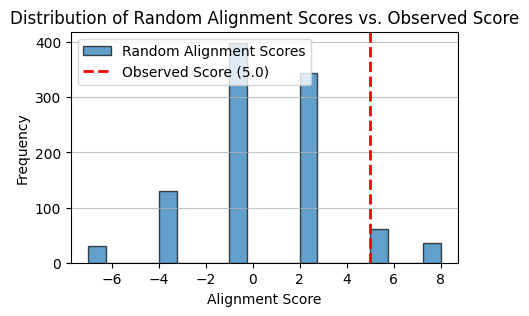

Histogram of random alignment scores with observed score marked displayed.


In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the random alignment scores
plt.figure(figsize=(5, 3))
plt.hist(random_alignment_scores, bins=20, edgecolor='black', alpha=0.7, label='Random Alignment Scores')

# Mark the observed alignment score on the histogram
plt.axvline(observed_alignment_score, color='red', linestyle='dashed', linewidth=2, label=f'Observed Score ({observed_alignment_score})')

# Add labels and title for clarity
plt.title('Distribution of Random Alignment Scores vs. Observed Score')
plt.xlabel('Alignment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Histogram of random alignment scores with observed score marked displayed.")

### Statistical Significance of the P-value

The calculated p-value is **`0.097`**.

Typically, a p-value less than `0.05` (or sometimes `0.01`) is considered statistically significant, suggesting that the observed result is unlikely to have occurred by random chance.

In this case:

*   **Interpretation**: A p-value of `0.097` is greater than the common significance level of `0.05`. This means that approximately `9.7%` of the random alignment scores were greater than or equal to the observed score. Therefore, we **do not have sufficient statistical evidence** to conclude that the observed alignment score is significantly different from what would be expected by chance based on random permutations of `s2`'s composition.
*   **Conclusion**: The observed alignment score of `5.0` is not statistically significant at the `0.05` level, implying that an alignment score this high (or higher) could reasonably occur even if the sequences `s1` and `s2` do not have a stronger biological relationship than random sequences with similar composition.

### Statistical Significance of the P-value

The calculated p-value is **`0.097`**.

Typically, a p-value less than `0.05` (or sometimes `0.01`) is considered statistically significant, suggesting that the observed result is unlikely to have occurred by random chance.

In this case:

*   **Interpretation**: A p-value of `0.097` is greater than the common significance level of `0.05`. This means that approximately `9.7%` of the random alignment scores were greater than or equal to the observed score. Therefore, we **do not have sufficient statistical evidence** to conclude that the observed alignment score is significantly different from what would be expected by chance based on random permutations of `s2`'s composition.
*   **Conclusion**: The observed alignment score of `5.0` is not statistically significant at the `0.05` level, implying that an alignment score this high (or higher) could reasonably occur even if the sequences `s1` and `s2` do not have a stronger biological relationship than random sequences with similar composition.